In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


reviews = pd.read_csv("./cleaned-reviews.csv")
reviews.describe()

,Unnamed: 0,rates
count,3411.000000,3411.000000
mean,1705.668133,4.821167
std,985.831888,3.145863
min,0.000000,1.000000
25%,852.500000,2.000000
50%,1705.000000,4.000000
75%,2557.500000,8.000000
max,3417.000000,10.000000


#### Existe un sesgo de pais de origen de los clientes al puntuar el servicio ?

In [8]:
filter_reviews_per_country_rate = reviews[["country","rates"]]
filter_reviews_per_country_rate

,country,rates
0,United Kingdom,5
1,United Kingdom,9
2,United Kingdom,9
3,United Kingdom,9
4,United States,2
...,...,...
3406,Australia,10
3407,United Kingdom,1
3408,United Kingdom,4
3409,United Kingdom,2


In [9]:
df_country_rate = filter_reviews_per_country_rate.country.value_counts().to_frame()
df_country_rate["mean"] = filter_reviews_per_country_rate.groupby("country")["rates"].mean()
df_country_rate = df_country_rate.reset_index().rename(columns={"index":"country","country":"quantity"})
df_country_rate


,country,quantity,mean
0,United Kingdom,2165,4.899769
1,United States,361,4.351801
2,Australia,147,5.414966
3,Canada,104,4.913462
4,Germany,60,4.416667
...,...,...,...
64,Iceland,1,3.000000
65,Saint Kitts and Nevis,1,10.000000
66,Costa Rica,1,8.000000
67,Cayman Islands,1,2.000000


#### De lo anterior vemos que tratamos con 69 paises, es una columna categorica muy amplia. Por esta razon segmentaremos los datos y resolvemos para aquellos que dan un puntaje alto

In [10]:
df_country_rate_head = df_country_rate.head(15)
df_country_rate_head

,country,quantity,mean
0,United Kingdom,2165,4.899769
1,United States,361,4.351801
2,Australia,147,5.414966
3,Canada,104,4.913462
4,Germany,60,4.416667
5,South Africa,37,4.675676
6,Switzerland,37,5.270270
7,Ireland,36,4.472222
8,Netherlands,32,5.218750
9,Singapore,27,4.925926


Text(0.5, 1.0, 'Relationship between countries with the most appearance in score vs score')

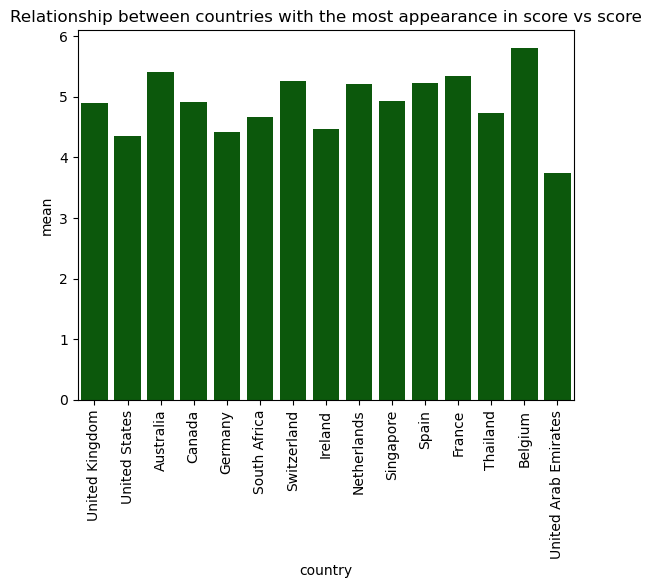

In [15]:
sns.barplot(data=df_country_rate_head,x="country",y="mean",color="darkgreen")
plt.xticks(rotation=90)
plt.title("Relationship between countries with the most appearance in score vs score")

In [12]:
df_country_rate_tail = df_country_rate.tail(15)
df_country_rate_tail

,country,quantity,mean
54,Jordan,1,3.0
55,Dominican Republic,1,9.0
56,Barbados,1,9.0
57,Trinidad & Tobago,1,6.0
58,Ukraine,1,8.0
59,Panama,1,1.0
60,Bahrain,1,1.0
61,Vietnam,1,3.0
62,Indonesia,1,2.0
63,Laos,1,10.0


Text(0.5, 1.0, 'Relationship between countries with less appearance in score vs score')

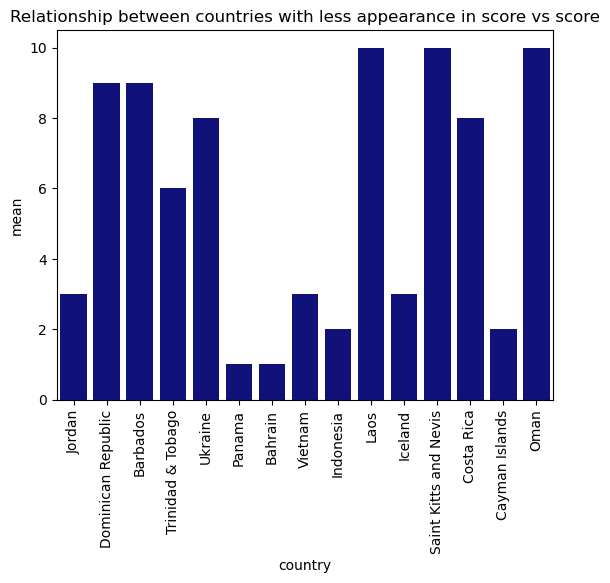

In [14]:
sns.barplot(data=df_country_rate_tail,x="country",y="mean",color="darkblue")
plt.xticks(rotation=90)
plt.title("Relationship between countries with less appearance in score vs score")

### Primeras conclusiones:

#### 1. Países con pocas apariciones: Los países con una sola aparición como origen de los clientes presentan puntuaciones muy dispares, desde la excelencia (10) hasta la insuficiencia (1). Debido a la escasez de datos, no podemos considerar este factor como determinante.

#### 2. Países con más apariciones: Los países con mayor número de apariciones ofrecen resultados más confiables. El promedio de puntuación al servicio ronda el 5, lo que indica que la empresa brinda un servicio regular.


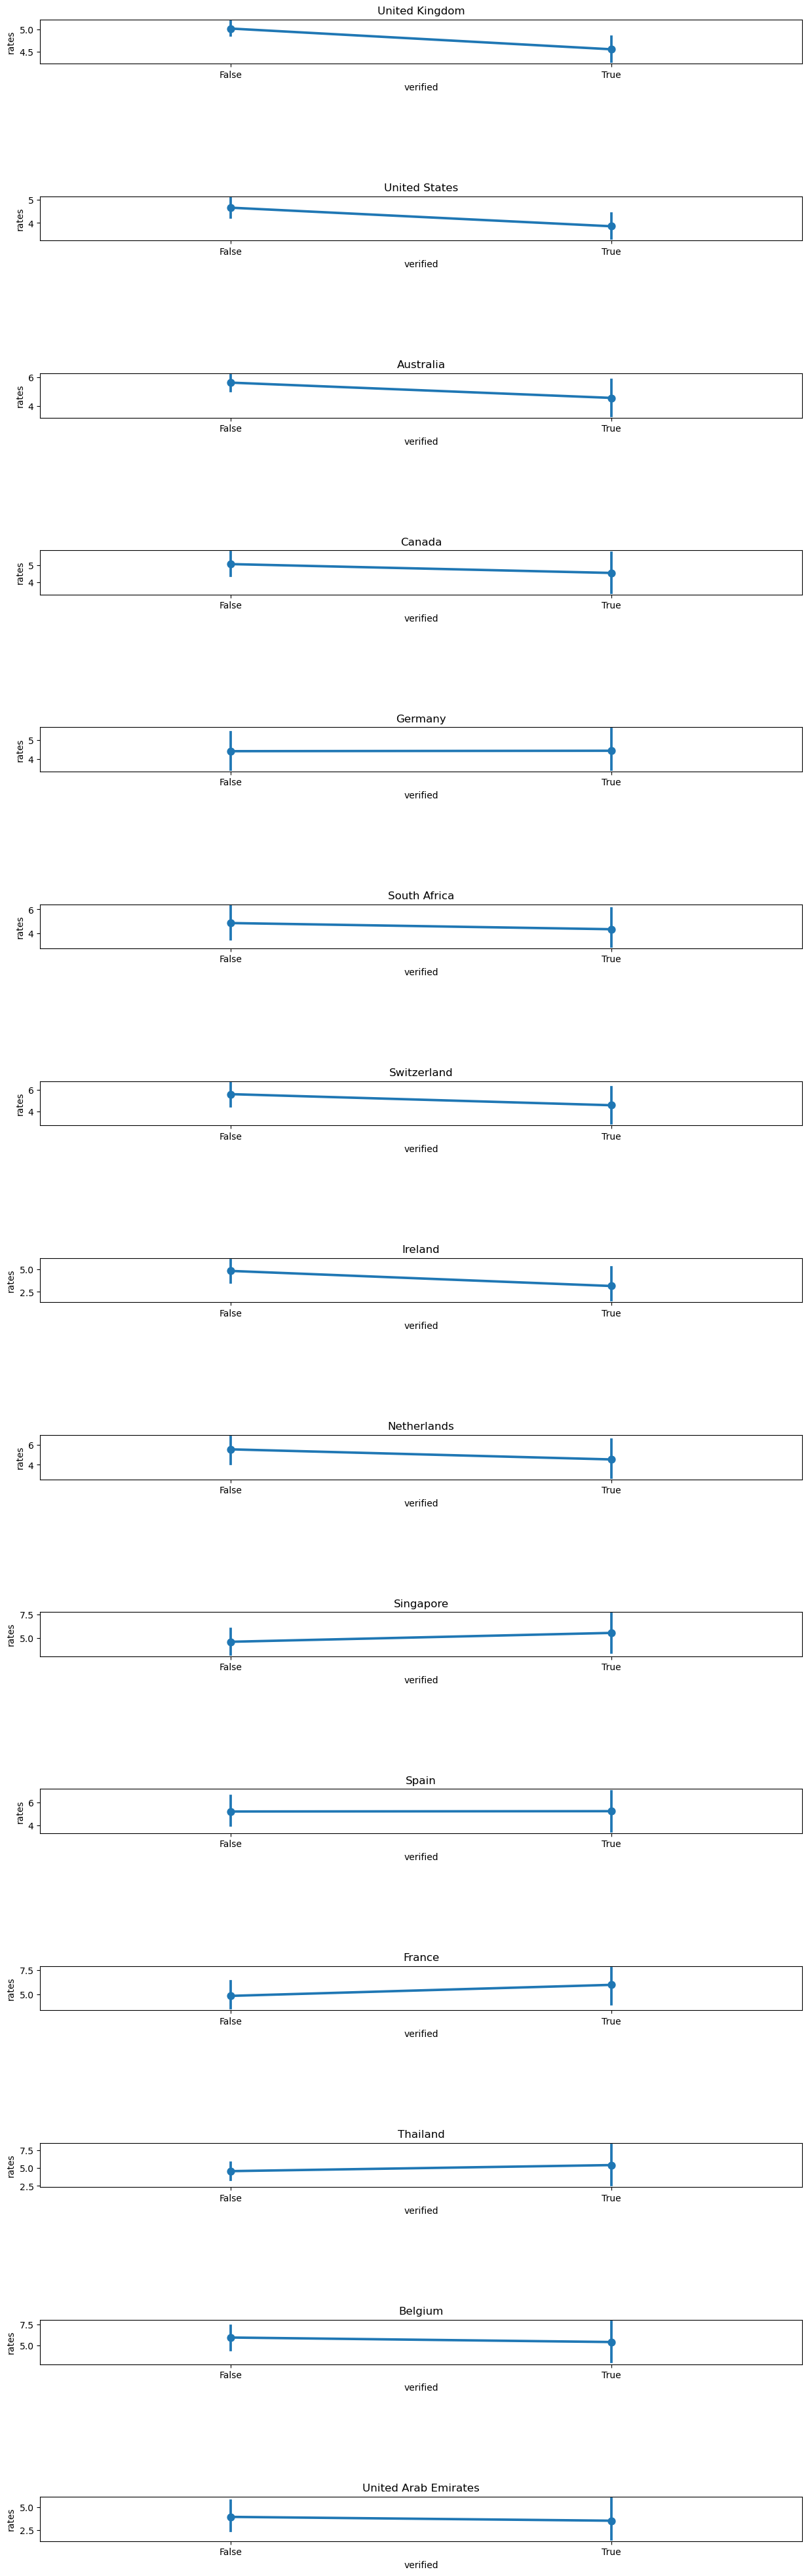

In [46]:
countries = ["United Kingdom","United States","Australia","Canada","Germany","South Africa","Switzerland","Ireland","Netherlands","Singapore","Spain","France","Thailand","Belgium","United Arab Emirates"]

fig,ax = plt.subplots(nrows=len(countries),ncols=1,figsize=(15,50))
fig.subplots_adjust(hspace=3)

for i,country in enumerate(countries):
  df_country_rate = reviews.loc[reviews.country == country,:]
  sns.pointplot(x="verified",data=df_country_rate,ax=ax[i],y="rates")
  ax[i].set_title(country)

### Finalizando Analisis:

#### 1. Paises como Belgica,Francia, Singapur, Tailandia y España tienen a dar puntajes mas altos
#### 2. Paises como United Kingdom, United States, Australia, Canada, Switzerland, Ireland tienen a dar puntajes mas bajos
#### 3. Para el resto de paises en cuestion, los puntajes son mas regulares, rondando alredor del cuatro/cinco en promedio